# Natural Language Processing - Text Summarization example

###### Links: [CNN DailyMail (HuggingFace)](https://huggingface.co/datasets/cnn_dailymail)  |  [Article (TowardsDataScience)](https://towardsdatascience.com/text-summarization-with-nlp-textrank-vs-seq2seq-vs-bart-474943efeb09)

### 0 - Setup

###### Import pckgs

In [41]:
import warnings
warnings.filterwarnings("ignore")
from scripts.utils.nlp_utils import create_stopwords\
    , add_preprocessed_text, word_freq, add_text_length, plot_distributions\
    , bart
import pandas as pd

In [43]:
%reload_ext autoreload
%autoreload 2

###### Import data

In [3]:
# import datasets
# dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

Dataset cnn_dailymail downloaded and prepared to /home/mayank-soni/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 187.79it/s]


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [6]:
# lst_dics = [dic for dic in dataset["train"]]
# dtf = pd.DataFrame(lst_dics).rename(columns={"article":"text", "highlights":"y"})[["text","y"]].head(20000)
# dtf.to_csv("data_summary.csv", index=False)
# dtf.head()

,text,y
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa..."
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non..."
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical..."


In [11]:
dtf = pd.read_csv("data_summary.csv")
dtf.head()

,text,y
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa..."
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non..."
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical..."


In [12]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   y       20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [13]:
# check
i = 1
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less li

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [14]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["cnn","say","said","new","wa","ha"]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
dtf = add_preprocessed_text(dtf, column="text", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf = add_preprocessed_text(dtf, column="y", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf.head()

,text,y,text_clean,y_clean
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,london england reuters harry potter star danie...,harry potter star daniel radcliffe get 20m for...
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,editor note behind scene series correspondent ...,mentally ill inmate miami housed forgotten flo...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",minneapolis minnesota driver minneapolis bridg...,thought going die driver man pickup truck fold...
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",washington doctor removed five small polyp pre...,five small polyp found procedure none worrisom...
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",national football league indefinitely suspende...,nfl chief atlanta falcon owner critical michae...


In [18]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
editor note behind scene series correspondent share experience covering news analyze story behind event soledad obrien take user inside jail many inmate mentally ill inmate housed forgotten floor many mentally ill inmate housed miami trial miami florida ninth floor miamidade pretrial detention facility dubbed forgotten floor inmate severe mental illness incarcerated ready appear court often face drug charge charge assaulting officer charge judge steven leifman usually avoidable felony arrest often result confrontation police mentally ill people often told police arrive scene confrontation seems exacerbate illness become paranoid delusional le likely follow direction according leifman end ninth floor severely mentally disturbed getting real help jail toured jail leifman well known miami advocate justice mentally ill even though exactly welcomed open arm guard given permission shoot videotape tour floor go inside forgotten floor first hard determine people prisoner wear

###### Word frequency

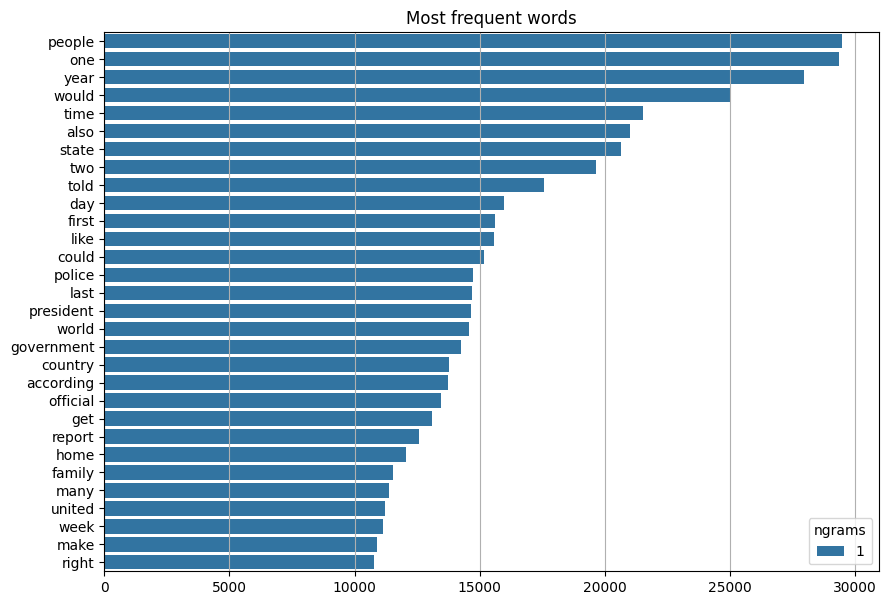

,word,freq,ngrams
0,people,29496,1
1,one,29370,1
2,year,27966,1
3,would,25000,1
4,time,21527,1
...,...,...,...
131424,tvwatchers,1,1
131425,bottomofthebarrel,1,1
131426,udderly,1,1
131427,tvviewing,1,1


In [21]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [22]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

41277

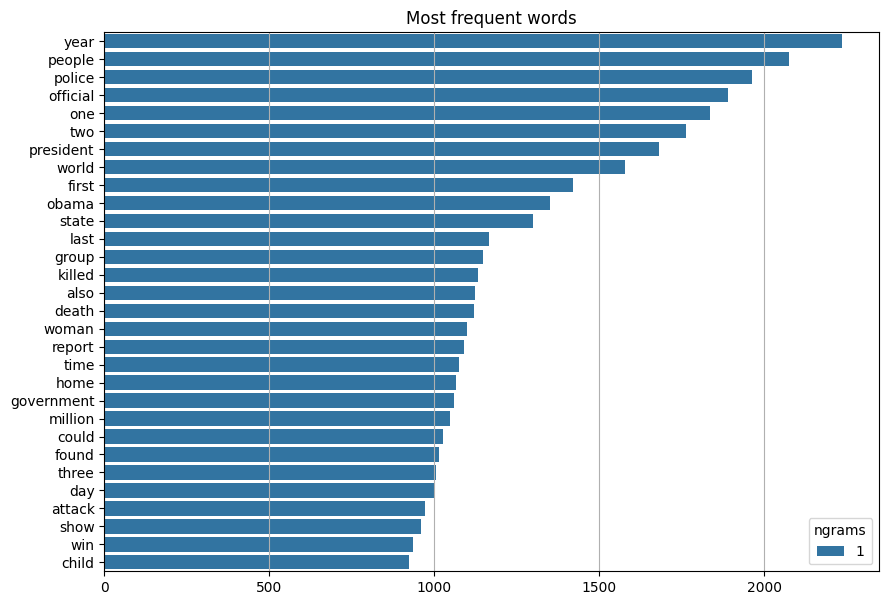

,word,freq,ngrams
0,year,2237,1
1,people,2076,1
2,police,1962,1
3,official,1889,1
4,one,1836,1
...,...,...,...
37837,maximus,1,1
37838,redux,1,1
37839,grossout,1,1
37840,relaunching,1,1


In [23]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

In [24]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

10121

###### Length analysis

In [28]:
# Texts
X = add_text_length(dtf, "text_clean")

                          min        mean          max
char_count           64.00000  2045.42595  7562.000000
word_count           11.00000   330.38190  1309.000000
sentence_count        1.00000     1.00000     1.000000
avg_word_length       4.62704     6.20351     7.666667
avg_sentence_lenght  11.00000   330.38190  1309.000000


,text,y,text_clean,y_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,london england reuters harry potter star danie...,harry potter star daniel radcliffe get 20m for...,250,1386,1,5.544000,250.0
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,editor note behind scene series correspondent ...,mentally ill inmate miami housed forgotten flo...,351,2105,1,5.997151,351.0
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",minneapolis minnesota driver minneapolis bridg...,thought going die driver man pickup truck fold...,342,1913,1,5.593567,342.0
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",washington doctor removed five small polyp pre...,five small polyp found procedure none worrisom...,252,1619,1,6.424603,252.0
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",national football league indefinitely suspende...,nfl chief atlanta falcon owner critical michae...,536,3321,1,6.195896,536.0
...,...,...,...,...,...,...,...,...,...
19995,Los Angeles (CNN) -- A 24-year-old Connecticut...,"Kevin George Poe, 24, of Connecticut is accuse...",los angeles 24yearold connecticut man affiliat...,kevin george poe 24 connecticut accused anonym...,155,1030,1,6.645161,155.0
19996,Jerusalem (CNN) -- Israeli officials were work...,"Israeli president: ""The crime is terrible (and...",jerusalem israeli official working repair ceme...,israeli president crime terrible everything st...,372,2380,1,6.397849,372.0
19997,New York City is the quintessential metropolis...,"New York City is frenetic and glamorous, the q...",york city quintessential metropolis city city ...,york city frenetic glamorous quintessential me...,306,1887,1,6.166667,306.0
19998,Los Angeles Film Festival (June 18 -- 28) Sinc...,The L.A. film festival offers a chance to enjo...,los angeles film festival june 18 28 since osc...,l film festival offer chance enjoy cinema spir...,196,1140,1,5.816327,196.0


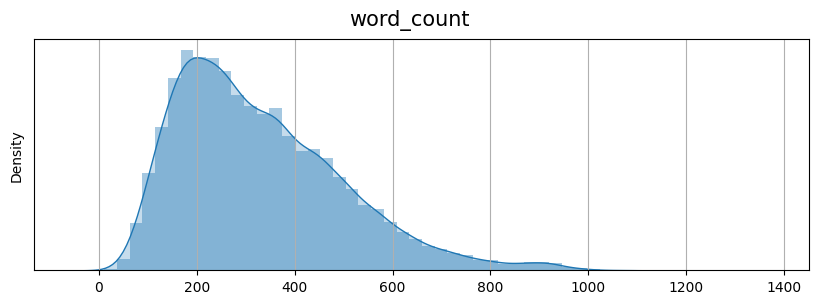

In [30]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [31]:
X_len = 400

400

In [32]:
# Summaries
y = add_text_length(dtf, "y_clean")

                           min        mean         max
char_count           35.000000  164.948200  324.000000
word_count            6.000000   27.180400   53.000000
sentence_count        1.000000    1.000000    1.000000
avg_word_length       3.785714    6.097504    9.043478
avg_sentence_lenght   6.000000   27.180400   53.000000


,text,y,text_clean,y_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,london england reuters harry potter star danie...,harry potter star daniel radcliffe get 20m for...,26,134,1,5.153846,26.0
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,editor note behind scene series correspondent ...,mentally ill inmate miami housed forgotten flo...,24,150,1,6.250000,24.0
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",minneapolis minnesota driver minneapolis bridg...,thought going die driver man pickup truck fold...,23,123,1,5.347826,23.0
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",washington doctor removed five small polyp pre...,five small polyp found procedure none worrisom...,20,136,1,6.800000,20.0
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",national football league indefinitely suspende...,nfl chief atlanta falcon owner critical michae...,31,196,1,6.322581,31.0
...,...,...,...,...,...,...,...,...,...
19995,Los Angeles (CNN) -- A 24-year-old Connecticut...,"Kevin George Poe, 24, of Connecticut is accuse...",los angeles 24yearold connecticut man affiliat...,kevin george poe 24 connecticut accused anonym...,24,158,1,6.583333,24.0
19996,Jerusalem (CNN) -- Israeli officials were work...,"Israeli president: ""The crime is terrible (and...",jerusalem israeli official working repair ceme...,israeli president crime terrible everything st...,24,147,1,6.125000,24.0
19997,New York City is the quintessential metropolis...,"New York City is frenetic and glamorous, the q...",york city quintessential metropolis city city ...,york city frenetic glamorous quintessential me...,20,142,1,7.100000,20.0
19998,Los Angeles Film Festival (June 18 -- 28) Sinc...,The L.A. film festival offers a chance to enjo...,los angeles film festival june 18 28 since osc...,l film festival offer chance enjoy cinema spir...,24,137,1,5.708333,24.0


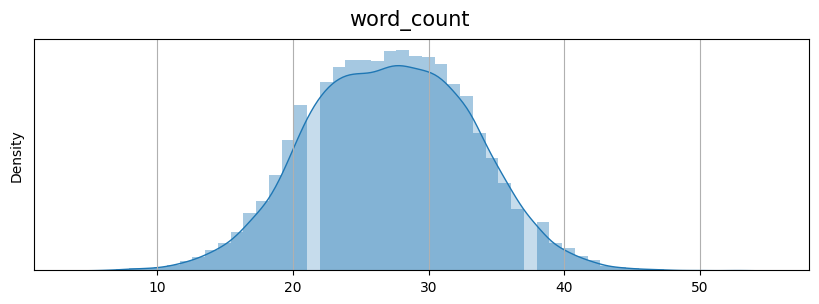

In [33]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [34]:
y_len = 40

40

###### Summary

In [35]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,"LONDON, England (Reuters) -- Harry Potter star...",london england reuters harry potter star danie...,Harry Potter star Daniel Radcliffe gets £20M f...,harry potter star daniel radcliffe get 20m for...
1,Editor's note: In our Behind the Scenes series...,editor note behind scene series correspondent ...,Mentally ill inmates in Miami are housed on th...,mentally ill inmate miami housed forgotten flo...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...",minneapolis minnesota driver minneapolis bridg...,"NEW: ""I thought I was going to die,"" driver sa...",thought going die driver man pickup truck fold...
3,WASHINGTON (CNN) -- Doctors removed five small...,washington doctor removed five small polyp pre...,"Five small polyps found during procedure; ""non...",five small polyp found procedure none worrisom...
4,(CNN) -- The National Football League has ind...,national football league indefinitely suspende...,"NEW: NFL chief, Atlanta Falcons owner critical...",nfl chief atlanta falcon owner critical michae...


### 2 - Preprocessing

In [36]:
# Partitioning
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
dtf_test

,text,text_clean,y,y_clean
0,"LONDON, England (Reuters) -- Harry Potter star...",london england reuters harry potter star danie...,Harry Potter star Daniel Radcliffe gets £20M f...,harry potter star daniel radcliffe get 20m for...
1,Editor's note: In our Behind the Scenes series...,editor note behind scene series correspondent ...,Mentally ill inmates in Miami are housed on th...,mentally ill inmate miami housed forgotten flo...


### 3 - Baseline (Extractive: TextRank)

In [34]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=y_len/X_len)

In [35]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.18 | rouge2: 0.04 | rougeL: 0.04 --> avg rouge: 0.14


In [36]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [37]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

--- tokenization ---
43004 words
--- padding to sequence ---
19998 sequences of length 400


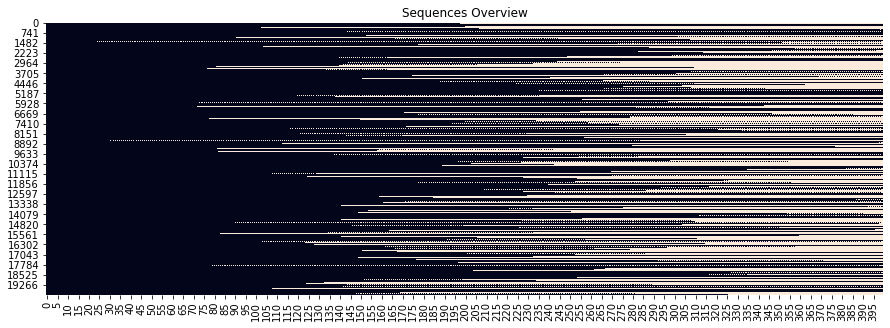

In [22]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [23]:
dict(list(X_dic_vocabulary.items())[0:6])

{'<PAD>': 0, 'one': 1, 'people': 2, 'year': 3, 'would': 4, 'time': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 400


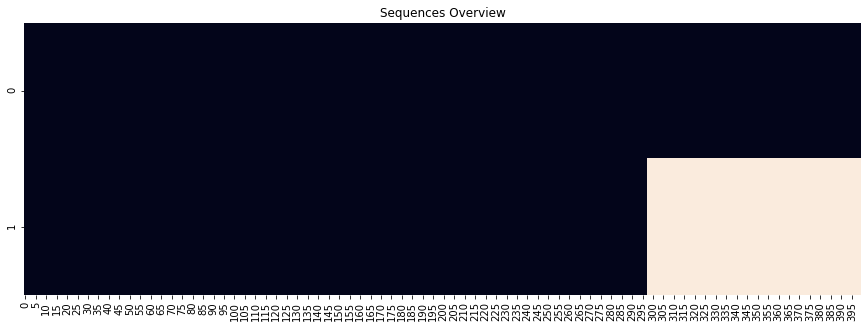

In [24]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [25]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> usain bolt win third gold world championship anchor jamaica 4x100m relay victory eighth gold championship bolt jamaica double woman 4x100m relay <END>'

--- tokenization ---
10248 words
--- padding to sequence ---
19998 sequences of length 40


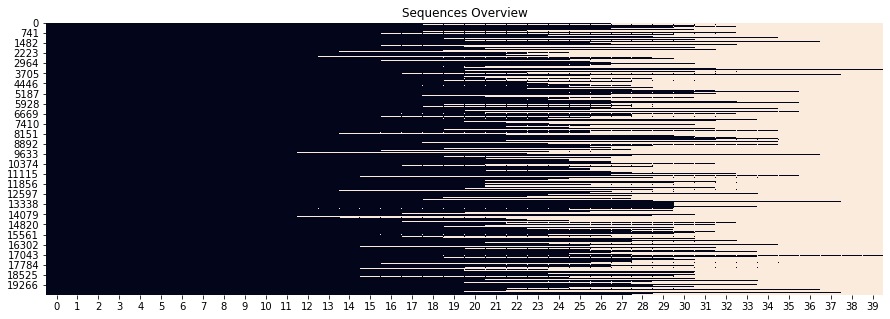

In [26]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_len)

y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [27]:
dict(list(y_dic_vocabulary.items())[0:6])

{'<PAD>': 0, '<START>': 1, '<END>': 2, 'year': 3, 'people': 4, 'one': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 40


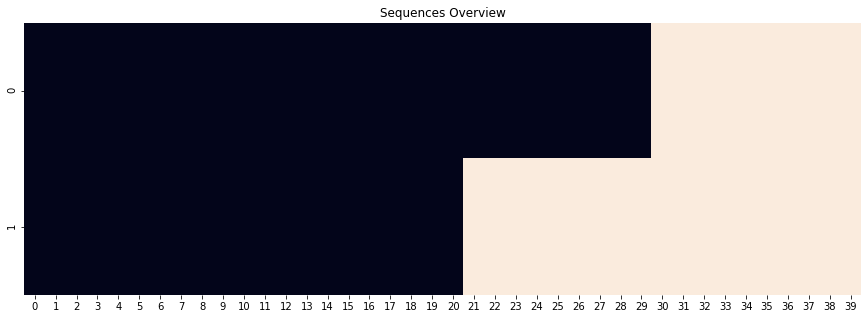

In [28]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [31]:
# Load pre-trained Word2Vec
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [32]:
# check nlp model
word = "home"
nlp[word].shape

(300,)

In [33]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 43005 vectors of size 300


(43005, 300)

In [34]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 10249 vectors of size 300


(10249, 300)

###### Model Design

In [36]:
# Basic Seq2Seq
lstm_units = 250
embeddings_size = 300

##------------ ENCODER (embeddings + lstm) -----------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=len(X_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4,  
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embeddings + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=len(y_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE --------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 400)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 400, 300)     12901200    x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    3074400     y_in[0][0]                       
____________________________________________________________________________________________

In [35]:
# Advanced Seq2Seq
lstm_units = 250

##------------ ENCODER (pre-trained embeddings + 3 bi-lstm) ---------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (pre-trained embeddings + lstm + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ------------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 400)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 400, 300)     12901500    x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 400, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)        [(None, 400, 500), ( 1502000     x_lstm_1[0][0]                   
____________________________________________________________________________________________

###### Train

Epoch 1/100
219/219 [==============================] - 355s 2s/step - loss: 5.4287 - accuracy: 0.3696 - val_loss: 5.2587 - val_accuracy: 0.3759
Epoch 2/100
219/219 [==============================] - 355s 2s/step - loss: 5.1787 - accuracy: 0.3801 - val_loss: 5.1966 - val_accuracy: 0.3771
Epoch 3/100
219/219 [==============================] - 357s 2s/step - loss: 5.0799 - accuracy: 0.3826 - val_loss: 5.1201 - val_accuracy: 0.3802
Epoch 4/100
219/219 [==============================] - 809s 4s/step - loss: 4.9903 - accuracy: 0.3858 - val_loss: 5.0544 - val_accuracy: 0.3821
Epoch 5/100
219/219 [==============================] - 358s 2s/step - loss: 4.8997 - accuracy: 0.3883 - val_loss: 4.9996 - val_accuracy: 0.3839
Epoch 6/100
219/219 [==============================] - 356s 2s/step - loss: 4.8151 - accuracy: 0.3907 - val_loss: 4.9544 - val_accuracy: 0.3858
Epoch 7/100
219/219 [==============================] - 355s 2s/step - loss: 4.7357 - accuracy: 0.3931 - val_loss: 4.9188 - val_accuracy:

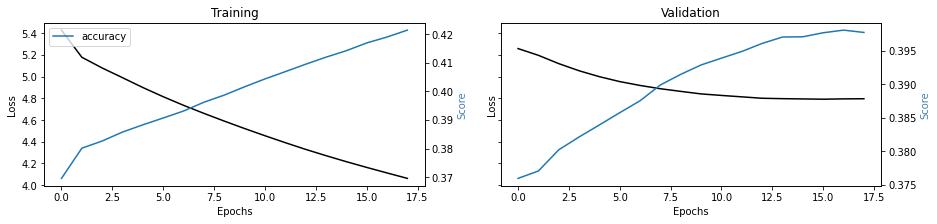

In [37]:
# This takes a while
model = fit_seq2seq(X_train, y_train, model, build_encoder_decoder=False, 
                    epochs=100, batch_size=64, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=100, batch_size=64)

###### Test

In [38]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

Model: "Prediction_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_in (InputLayer)            [(None, 400)]             0         
_________________________________________________________________
x_emb (Embedding)            (None, 400, 300)          12901200  
_________________________________________________________________
x_lstm (LSTM)                [(None, 400, 250), (None, 551000    
Total params: 13,452,200
Trainable params: 13,452,200
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

Model: "Prediction_Decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    3074400     y_in[0][0]                       
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 250)]        0                                            
_________________________________________________________________________________

In [40]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [41]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

rouge1: 0.04 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.03


In [42]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [43]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [42]:
# Test (no Train)
predicted = bart(corpus=dtf_test["text"], max_len=y_len)

Downloading: 100%|██████████| 1.58k/1.58k [00:00<00:00, 1.46MB/s]


RuntimeError: Failed to import transformers.models.bart.modeling_tf_bart because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

In [75]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.57 | rouge2: 0.26 | rougeL: 0.26 --> avg rouge: 0.49


In [76]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [77]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))